In [2]:
# dependencies
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.tree as tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score as accuracy
import graphviz 
%matplotlib inline
%matplotlib inline

# globals
RANDOM_SEED = 30254
NUMERIC_TYPES = set(('int', 'float', 'int64', 'float64'))

In [3]:
credit = pd.read_csv("credit-data.csv")

In [4]:
credit.head()

,PersonID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,zipcode,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,98976,0,1.000000,55,60601,0,505.000000,0.0,2,0,0,0,0.0
1,98991,0,0.547745,71,60601,0,0.459565,15666.0,7,0,2,0,0.0
2,99012,0,0.044280,51,60601,0,0.014520,4200.0,5,0,0,0,0.0
3,99023,0,0.914249,55,60601,4,0.794875,9052.0,12,0,3,0,0.0
4,99027,0,0.026599,45,60601,0,0.049966,10406.0,4,0,0,0,2.0


In [5]:
datadict = pd.read_excel("Data Dictionary.xls")

In [6]:
credit.age.describe()

count    41016.000000
mean        51.683489
std         14.746880
min         21.000000
25%         41.000000
50%         51.000000
75%         62.000000
max        109.000000
Name: age, dtype: float64

In [7]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41016 entries, 0 to 41015
Data columns (total 13 columns):
PersonID                                41016 non-null int64
SeriousDlqin2yrs                        41016 non-null int64
RevolvingUtilizationOfUnsecuredLines    41016 non-null float64
age                                     41016 non-null int64
zipcode                                 41016 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    41016 non-null int64
DebtRatio                               41016 non-null float64
MonthlyIncome                           33042 non-null float64
NumberOfOpenCreditLinesAndLoans         41016 non-null int64
NumberOfTimes90DaysLate                 41016 non-null int64
NumberRealEstateLoansOrLines            41016 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    41016 non-null int64
NumberOfDependents                      39979 non-null float64
dtypes: float64(4), int64(9)
memory usage: 4.1 MB


In [8]:
datadict

,Variable Name,Description,Type
0,SeriousDlqin2yrs,Person experienced 90 days past due delinquenc...,Y/N
1,RevolvingUtilizationOfUnsecuredLines,Total balance on credit cards and personal lin...,percentage
2,age,Age of borrower in years,integer
3,NumberOfTime30-59DaysPastDueNotWorse,Number of times borrower has been 30-59 days p...,integer
4,zipcode,zipcode of the borrower,interget/string
5,DebtRatio,"Monthly debt payments, alimony,living costs di...",percentage
6,MonthlyIncome,Monthly income,real
7,NumberOfOpenCreditLinesAndLoans,Number of Open loans (installment like car loa...,integer
8,NumberOfTimes90DaysLate,Number of times borrower has been 90 days or m...,integer
9,NumberRealEstateLoansOrLines,Number of mortgage and real estate loans inclu...,integer


In [9]:
credit.head()

,PersonID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,zipcode,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,98976,0,1.000000,55,60601,0,505.000000,0.0,2,0,0,0,0.0
1,98991,0,0.547745,71,60601,0,0.459565,15666.0,7,0,2,0,0.0
2,99012,0,0.044280,51,60601,0,0.014520,4200.0,5,0,0,0,0.0
3,99023,0,0.914249,55,60601,4,0.794875,9052.0,12,0,3,0,0.0
4,99027,0,0.026599,45,60601,0,0.049966,10406.0,4,0,0,0,2.0


In [10]:
credit[credit.columns].describe()

,PersonID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,zipcode,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,41016.000000,41016.000000,41016.00000,41016.000000,41016.000000,41016.000000,41016.000000,3.304200e+04,41016.000000,41016.000000,41016.000000,41016.000000,39979.000000
mean,115800.154598,0.161400,6.37587,51.683489,60623.824166,0.589233,331.458137,6.578996e+03,8.403477,0.419592,1.008801,0.371587,0.773231
std,28112.723511,0.367904,221.61895,14.746880,11.984357,5.205628,1296.109695,1.344683e+04,5.207324,5.190382,1.153826,5.169641,1.121269
min,22.000000,0.000000,0.00000,21.000000,60601.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,106539.750000,0.000000,0.03431,41.000000,60618.000000,0.000000,0.176375,3.333000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,119901.500000,0.000000,0.18973,51.000000,60625.000000,0.000000,0.369736,5.250000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,134698.250000,0.000000,0.66716,62.000000,60629.000000,0.000000,0.866471,8.055750e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,149999.000000,1.000000,22000.00000,109.000000,60644.000000,98.000000,106885.000000,1.794060e+06,56.000000,98.000000,32.000000,98.000000,13.000000


In [11]:
def find_outliers(df, var, lb, ub):
    ''' Checks whether all values of a variable fall within reasonable bounds '''

    too_small = df[var].loc[df[var] < lb]
    too_big = df[var].loc[df[var] > ub]

    print('# of values that are too small: ', len(too_small.index))
    print(too_small.head())
    print('# of values that are too large:', len(too_big.index))
    print(too_big.head())

    return 

In [12]:
find_outliers(credit, 'NumberOfDependents', 0, 10)

# of values that are too small:  0
Series([], Name: NumberOfDependents, dtype: float64)
# of values that are too large: 1
35147    13.0
Name: NumberOfDependents, dtype: float64


In [13]:
def plot_distr(df, *cols):
    ''' Create histograms of numeric variables in dataframe; 
        optionally specify which variables to use '''

    if not cols:
        cols = df.columns
    
    if len(cols) == 1:
        cols = [cols[0]]

    for c in cols:
        if str(df[c].dtype) in NUMERIC_TYPES:
            sns.distplot(df[c].loc[df[c].notnull()], kde = False)
            
    
    return

/Users/cecilemurray/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


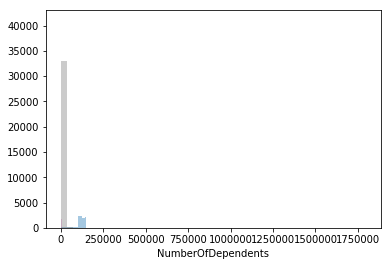

In [14]:
plot_distr(credit)

In [15]:
sns.scatterplot(x = 'age', y = 'SeriousDlqin2yrs', data = credit_clean)

NameError: name 'credit_clean' is not defined

In [16]:
def replace_missing(df, var, method = 'median'):
    ''' Takes data frame, optional column names, and optional replace value;
        replaces missing values either with median (default) or with specified value;
        returns data frame '''

    if method == 'median': 
        df[var] = df[var].fillna(df[var].median())
    
    else:
        pass
    
    return df

credit_clean = credit
for c in credit.columns:
    
    if str(credit[c].dtype) in ['int64', 'float64']:
        credit_clean = replace_missing(credit, c)

credit_clean.head()

,PersonID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,zipcode,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,98976,0,1.000000,55,60601,0,505.000000,0.0,2,0,0,0,0.0
1,98991,0,0.547745,71,60601,0,0.459565,15666.0,7,0,2,0,0.0
2,99012,0,0.044280,51,60601,0,0.014520,4200.0,5,0,0,0,0.0
3,99023,0,0.914249,55,60601,4,0.794875,9052.0,12,0,3,0,0.0
4,99027,0,0.026599,45,60601,0,0.049966,10406.0,4,0,0,0,2.0


In [17]:
def discretize(df, var, breaks, labels = False):
    ''' Convert continuous variable to discrete/categorical '''

    new_varname = var + '_disc'

    # handle case where upper bound less than max of variable
    if breaks[-1] < df[var].max():
        breaks.append(df[var].max())
        
    # handle case where lower bound greater than min of variable
    if breaks[0] > df[var].min():
        breaks.insert(0, df[var].min())

    if labels:
        df[new_varname] = pd.cut(df[var], np.array(breaks), labels = labels)
    else:
        df[new_varname] = pd.cut(df[var], np.array(breaks))

    return df

In [18]:
credit_clean = discretize(credit_clean, 'NumberOfDependents', 
                          breaks = [-1, 0, 1, 2, 4],
                          labels = ['0', '1', '2', '3-4', '4+'])

In [19]:
def make_cat_dummy(df, var, true_vals, new_varname = ''):
    ''' Takes: a data frame, the name of a categorical variable, the values to
        be assigned True, optional new variable name
        Returns: data frame with dummy variable added '''

    if not new_varname:
        new_varname = var + '_dummy'
    
    df[new_varname] = df[var] in true_vals

    return df


def make_cont_dummy(df, var, thresh, new_varname, greater = True, equal = True):
    '''Takes: a dataframe, string name of continuous variable, numeric threshold,
                string new variable name. Optional boolean args to switch from
                greater than => True (default) to less than => True, and to apply 
                strict inequality (default is greater than or equal tos)
        Returns: new dataframe with new column appended'''
    
    if greater and equal:
        df[new_varname] = np.where(df[var] >= thresh, 1, 0)
    elif greater and not equal:
        df[new_varname] = np.where(df[var] > thresh, 1, 0)
    elif not greater and equal:
        df[new_varname] = np.where(df[var] <= thresh, 1, 0)
    else:
        df[new_varname] = np.where(df[var] < thresh, 1, 0)
    
    return df

In [20]:
credit_clean = make_cont_dummy(credit_clean, 'DebtRatio', 1, 'DebtRatioOver1')

In [21]:
credit_clean.head()

,PersonID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,zipcode,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,NumberOfDependents_disc,DebtRatioOver1
0,98976,0,1.000000,55,60601,0,505.000000,0.0,2,0,0,0,0.0,0,1
1,98991,0,0.547745,71,60601,0,0.459565,15666.0,7,0,2,0,0.0,0,0
2,99012,0,0.044280,51,60601,0,0.014520,4200.0,5,0,0,0,0.0,0,0
3,99023,0,0.914249,55,60601,4,0.794875,9052.0,12,0,3,0,0.0,0,0
4,99027,0,0.026599,45,60601,0,0.049966,10406.0,4,0,0,0,2.0,2,0


In [23]:
def create_train_test_sets(df, target, features, size):
    ''' wrapper for scikitlearn's train_test_split '''

    y = df[target]
    x = df[features]

    return train_test_split(x, y, test_size=size)

In [24]:
feature_list = ['RevolvingUtilizationOfUnsecuredLines', 'age', 'NumberOfTime30-59DaysPastDueNotWorse',
                'DebtRatioOver1', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans',
               'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents']
x_train, x_test, y_train, y_test = create_train_test_sets(credit_clean,
                                                          'SeriousDlqin2yrs',
                                                          feature_list,
                                                         size = 0.25)

In [28]:
dec_tree = DecisionTreeClassifier()
dec_tree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

(array([8.422e+03, 0.000e+00, 1.000e+00, 7.000e+00, 0.000e+00, 2.400e+01,
        1.000e+00, 3.000e+00, 0.000e+00, 1.796e+03]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

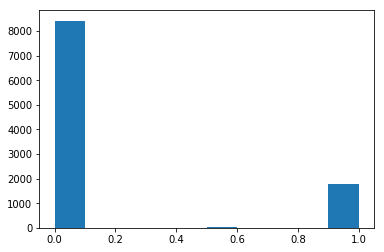

In [29]:
predicted_scores_test = dec_tree.predict_proba(x_test)[:,1]
plt.hist(predicted_scores_test)

In [31]:
threshold = 0.4
calc_threshold = lambda x,y: 0 if x < y else 1 
predicted_test = np.array( [calc_threshold(score, threshold) for score in predicted_scores_test] )
test_acc = accuracy(predicted_test, y_test)
print(test_acc)

0.7961771016188804


In [37]:
print(feature_list)
dec_tree.feature_importances_

['RevolvingUtilizationOfUnsecuredLines', 'age', 'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatioOver1', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans', 'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents']


array([0.33837145, 0.15267404, 0.05948409, 0.01168753, 0.17811862,
       0.09211418, 0.045452  , 0.07392392, 0.04817418])

In [40]:
viz = tree.export_graphviz(dec_tree, feature_names=x_train.columns,
                           class_names=['Europe', 'Not Europe'],
                           rounded=True, filled=True)
# graphviz.Source(viz)

# with open("tree.dot") as f:
#     dot_graph = f.read()
#     graph = graphviz.Source(dot_graph)
# graph

In [43]:
dict(zip(feature_list, list(dec_tree.feature_importances_)))

{'RevolvingUtilizationOfUnsecuredLines': 0.3383714465492446,
 'age': 0.1526740393135833,
 'NumberOfTime30-59DaysPastDueNotWorse': 0.05948408661868852,
 'DebtRatioOver1': 0.011687531291844489,
 'MonthlyIncome': 0.17811862395280822,
 'NumberOfOpenCreditLinesAndLoans': 0.09211417725433063,
 'NumberRealEstateLoansOrLines': 0.04545200260673041,
 'NumberOfTime60-89DaysPastDueNotWorse': 0.07392391665229901,
 'NumberOfDependents': 0.048174175760470686}